In [66]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

<h2>neural network class</h2>
<h3>containig: train, predict and loss methods</h3>

In [106]:
class neural_network:
    
    def __init__(self,ni,nh,no,activation, lr):
        self.ni = ni
        self.nh = nh
        self.no = no
        self.lr = lr
        self.activation = activation
        
        #self.wh=np.random.rand(self.nh,self.ni)
        self.wh = np.random.normal(0, 1, (self.nh, self.ni))/np.sqrt(ni)
        self.bh=np.zeros((self.nh,1))
        #self.wo=np.random.rand(self.no,self.nh)
        self.wo = np.random.normal(0, 1, (self.no, self.nh))/np.sqrt(nh)
        self.bo=np.zeros((self.no,1))
        
        if activation=='sigmoid':
            self.nonlin= lambda x: 1/(1+np.exp(-x))
            self.dnonlin= lambda x: 1/(1+np.exp(-x))*(1-1/(1+np.exp(-x)))
        elif activation=='tanh':
            self.nonlin= lambda x: np.tanh(x)
            self.dnonlin= lambda x: 1/np.cosh(x)**2
        else:
            self.nonlin=lambda x: np.maximum(x, 0, x)
            self.dnonlin=lambda x: np.ones(x.shape)*(x>0)
        
        pass

    def loss(self,y,pred):
        return np.sum(0.5*(y-pred)**2)

    def predict(self,x):
        x=x.T
        a1=self.nonlin(np.dot(self.wh,x)+self.bh)
        a2=self.nonlin(np.dot(self.wo,a1)+self.bo)
        return a2

    def train(self,X,y):
    
        X=X.T
        y=y.T
    

        #train using the whole training sample
        batch_size = X.shape[1]
    
        #number of times to go over the training data
        epochs=50000

        print('training network with ' + self.activation + ' activation:')
        for i in range(epochs):
            #input into hidden layer
            zh=np.dot(self.wh,X)+np.repeat(self.bh,batch_size,axis=1)
            #hidden layer activations
            ah=self.nonlin(zh)
            #input into output layer
            zo=np.dot(self.wo,ah)+np.repeat(self.bo,batch_size,axis=1)
            #output layer
            ao=self.nonlin(zo)        

            #output layer error - difference with true label y
            err=(ao-y)
            
            #print error every 10000 epochs
            if (i%10000==0):
                print('loss after %d epochs %f' % (i,self.loss(y,ao)))

            delo=err*self.dnonlin(zo)
            delh=(self.wo.T.dot(delo))*self.dnonlin(zh)

            #weights update
            self.wh-=self.lr*np.dot(delh,X.T)/batch_size
            self.wo-=self.lr*np.dot(delo,ah.T)/batch_size

            #biases update
            meanh=np.expand_dims(np.sum(delh,axis=1)/batch_size,1)
            meano=np.expand_dims(np.sum(delo,axis=1)/batch_size,1)
            self.bh-=self.lr*meanh
            self.bo-=self.lr*meano
            
        pass

<h3>XOR function</h3>

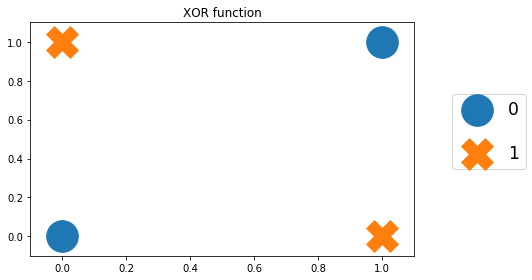

In [187]:
plt.scatter([0,1],[0,1],s=1000,marker='o',label='0')
plt.scatter([0,1],[1,0],s=1000,marker='X',label='1')
plt.legend(loc=(1.1,0.37),fontsize = 'xx-large',labelspacing=1.5)
plt.title('XOR function')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1]);
plt.tight_layout()

<h2>setting up network and learning</h2>

In [107]:
np.random.seed(0)

X=np.array([[0,0],[1,0],[0,1],[1,1]])
y=np.array([[0],[1],[1],[0]])

nn1=neural_network(2,2,1,'sigmoid',5)
nn2=neural_network(2,2,1,'tanh',0.3)
nn3=neural_network(2,2,1,'relu',0.1)

nn1.train(X,y)
print()
nn2.train(X,y)
print()
nn3.train(X,y)

training network with sigmoid activation:
loss after 0 epochs 0.524041
loss after 10000 epochs 0.000211
loss after 20000 epochs 0.000101
loss after 30000 epochs 0.000066
loss after 40000 epochs 0.000049

training network with tanh activation:
loss after 0 epochs 0.815223
loss after 10000 epochs 0.000089
loss after 20000 epochs 0.000041
loss after 30000 epochs 0.000026
loss after 40000 epochs 0.000019

training network with relu activation:
loss after 0 epochs 0.726709
loss after 10000 epochs 0.000000
loss after 20000 epochs 0.000000
loss after 30000 epochs 0.000000
loss after 40000 epochs 0.000000


<h2>Check final network results</h2>

In [108]:
print('sigmoid net:')
for x,p in zip(X,nn1.predict(X)[0]):
    print('input :',x, 'output:', p)
    
print('tanh net:')    
for x,p in zip(X,nn2.predict(X)[0]):
    print('input :',x, 'output:', p)
    
print('relu net:')        
for x,p in zip(X,nn3.predict(X)[0]):
    print('input :',x, 'output:', p)

sigmoid net:
input : [0 0] output: 0.00498677608341
input : [1 0] output: 0.995797811796
input : [0 1] output: 0.995807280359
input : [1 1] output: 0.00427497259731
tanh net:
input : [0 0] output: 2.54374979424e-05
input : [1 0] output: 0.996137582397
input : [0 1] output: 0.996104441828
input : [1 1] output: 3.76155213167e-05
relu net:
input : [0 0] output: 4.20935895214e-15
input : [1 0] output: 1.0
input : [0 1] output: 1.0
input : [1 1] output: 1.78584538084e-15


In [100]:
nn2.predict(np.array([[1,1]]))

array([[  3.76155213e-05]])

<h3>activation functions</h3>

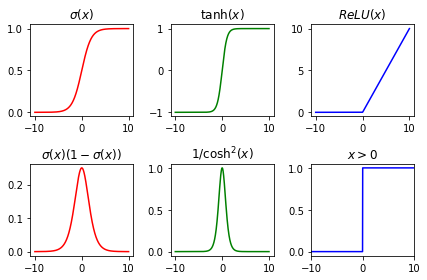

In [662]:
x=np.arange(-10,10,0.01)

#fig=plt.subplots(2,3)

plt.subplot(231)
plt.title(r'$\sigma(x)$')
plt.plot(x,1/(1+np.exp(-x)),'r')

plt.subplot(234)
plt.title(r'$\sigma(x)(1-\sigma(x))$')
plt.plot(x,1/(1+np.exp(-x))*(1-1/(1+np.exp(-x))),'r')

plt.subplot(232)
plt.title(r'$\tanh(x)$')
plt.plot(x,np.tanh(x),'g')

plt.subplot(235)
plt.title(r'$1/\cosh^2(x)$')
plt.plot(x,1/np.cosh(x)**2,'g')

plt.subplot(233)
plt.title(r'$ReLU(x)$')
plt.plot(x,x*(x>0),'b')

plt.subplot(236)
plt.title(r'$x>0$')
plt.plot(x,1*(x>0),'b')

plt.tight_layout()

plt.xlim([-10,10])

plt.savefig('activations.png',bbox_inches='tight',dpi=300)